<a href="https://colab.research.google.com/github/shashankchintu99/semester3-projects/blob/main/deeplearning/assignments/Shashankreddy_Kandimalla_Assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Part1: Using available pre-trained models for object detection, conduct inference on a short video (5-10 seconds) of a street scene drawing bounding boxes around detected vehicles.

Step 1. Collect a source video. It may be necessary to divide the video into discrete image frames.

Step 2. Conduct inference on each frame of the video, drawing bounding boxes around detected vehicles.

Step 3. Format the results back into a video.

Use either Pytorch or Tensorflow.

Upload a .zip file containing your .ipynb notebook containing the code utilized and two video files: before inference (without bounding boxes) and after inference (with bounding boxes)

In [ ]:
# Step 1: Install and Import Dependencies
!pip install -q torch torchvision torchaudio
!pip install -q yolov5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.4/953.4 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 1

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # Clone YOLOv5 repository
%cd yolov5
!pip install -r requirements.txt  # Install dependencies

Cloning into 'yolov5'...
remote: Enumerating objects: 16491, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 16491 (delta 27), reused 36 (delta 9), pack-reused 16408
Receiving objects: 100% (16491/16491), 15.17 MiB | 30.76 MiB/s, done.
Resolving deltas: 100% (11290/11290), done.
/content/yolov5/yolov5


In [ ]:
import torch
import cv2
from google.colab import drive
import os
from tqdm.auto import tqdm

# Step 2: Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import YOLOv5
from yolov5 import YOLOv5

# Step 3: Load YOLOv5s Pretrained Model
model_path = 'yolov5s.pt'
yolov5s_model = YOLOv5(model_path)

100%|██████████| 14.1M/14.1M [00:00<00:00, 41.2MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [ ]:
# Step 4: Divide Video into Frames
video_path = '/content/drive/My Drive/deep-learninng/assignment4.mp4'
frames_dir = '/content/drive/My Drive/deep-learninng/frames'
os.makedirs(frames_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)
frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_file = os.path.join(frames_dir, f"frame_{frame_count:05d}.jpg")
    cv2.imwrite(frame_file, frame)
    frame_count += 1

cap.release()

In [ ]:
# Step 5: Conduct Inference on Each Frame and Annotate
annotated_frames_dir = '/content/drive/My Drive/deep-learninng/annotated_frames'
os.makedirs(annotated_frames_dir, exist_ok=True)

for i in tqdm(range(frame_count)):
    frame_file = os.path.join(frames_dir, f"frame_{i:05d}.jpg")
    frame = cv2.imread(frame_file)

    # Convert frame to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Perform inference
    results = yolov5s_model.predict(frame_rgb)
    annotated_frame = results.render()[0]

    # Convert back to BGR
    annotated_frame = cv2.cvtColor(annotated_frame, cv2.COLOR_RGB2BGR)
    annotated_frame_file = os.path.join(annotated_frames_dir, f"frame_{i:05d}.jpg")
    cv2.imwrite(annotated_frame_file, annotated_frame)


  0%|          | 0/191 [00:00<?, ?it/s]

WARNING ⚠️ NMS time limit 0.550s exceeded


In [ ]:
# Step 6: Reassemble Frames into a Video
output_path = '/content/drive/My Drive/deep-learninng/annotated_sample.mp4'
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

In [ ]:
# Assuming all frames have the same size
sample_frame = cv2.imread(os.path.join(annotated_frames_dir, "frame_00000.jpg"))
height, width, _ = sample_frame.shape

out = cv2.VideoWriter(output_path, fourcc, 20.0, (width, height))

for i in range(frame_count):
    frame_file = os.path.join(annotated_frames_dir, f"frame_{i:05d}.jpg")
    frame = cv2.imread(frame_file)
    out.write(frame)

out.release()

part 2:

Follow the steps in YOLOV8 and attach a screenshot of object detection

Windows: https://medium.com/@pat.x.guillen/a-step-by-step-guide-to-running-yolov8-on-windows-122cb586b567Links to an external site.

Mac: https://pysource.com/2023/03/28/object-detection-with-yolo-v8-on-mac-m1/Links to an external site.

buttery fly dataset: use ~10 images from

https://universe.roboflow.com/yolo-a6y21/squid-bat-butterflyLinks to an external site.



In [ ]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data="/content/drive/My Drive/butterfly2/data.yaml" epochs=25 imgsz=800 plots=True


Ultralytics YOLOv8.1.19 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/My Drive/butterfly2/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

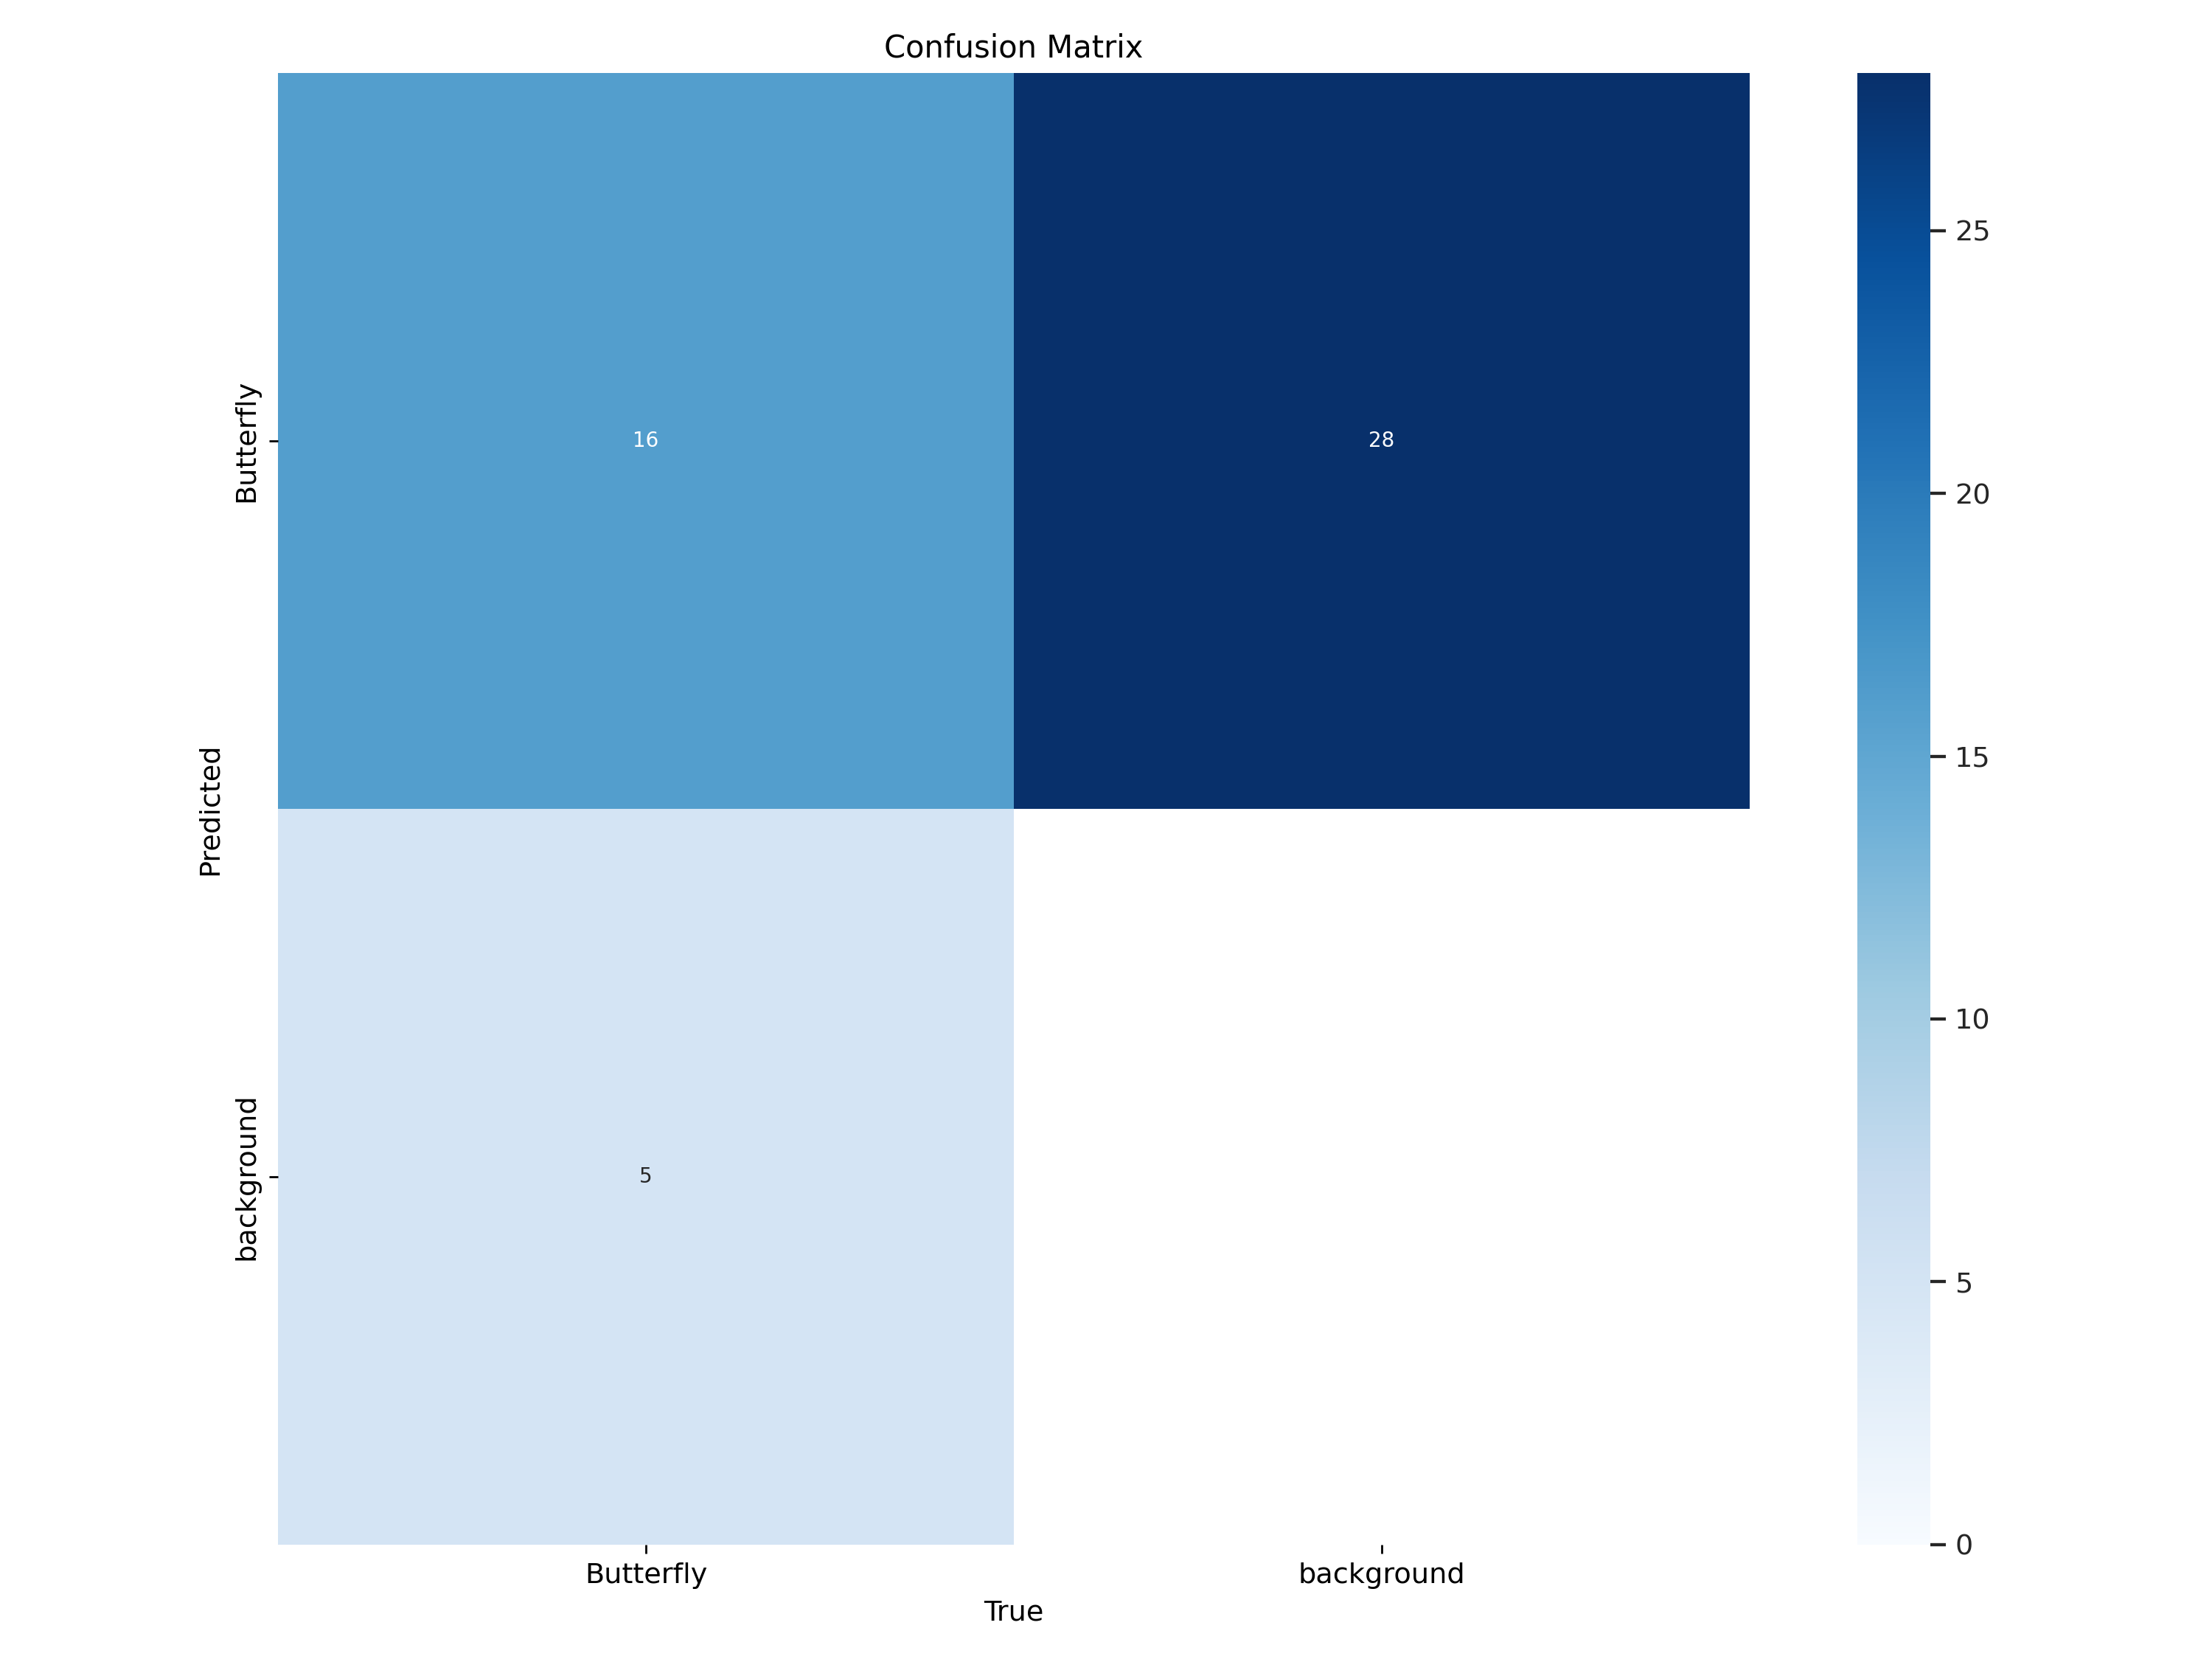

In [ ]:
from IPython.display import display, Image
Image(filename=f'/content/yolov5/yolov5/runs/detect/train2/confusion_matrix.png', width=600)

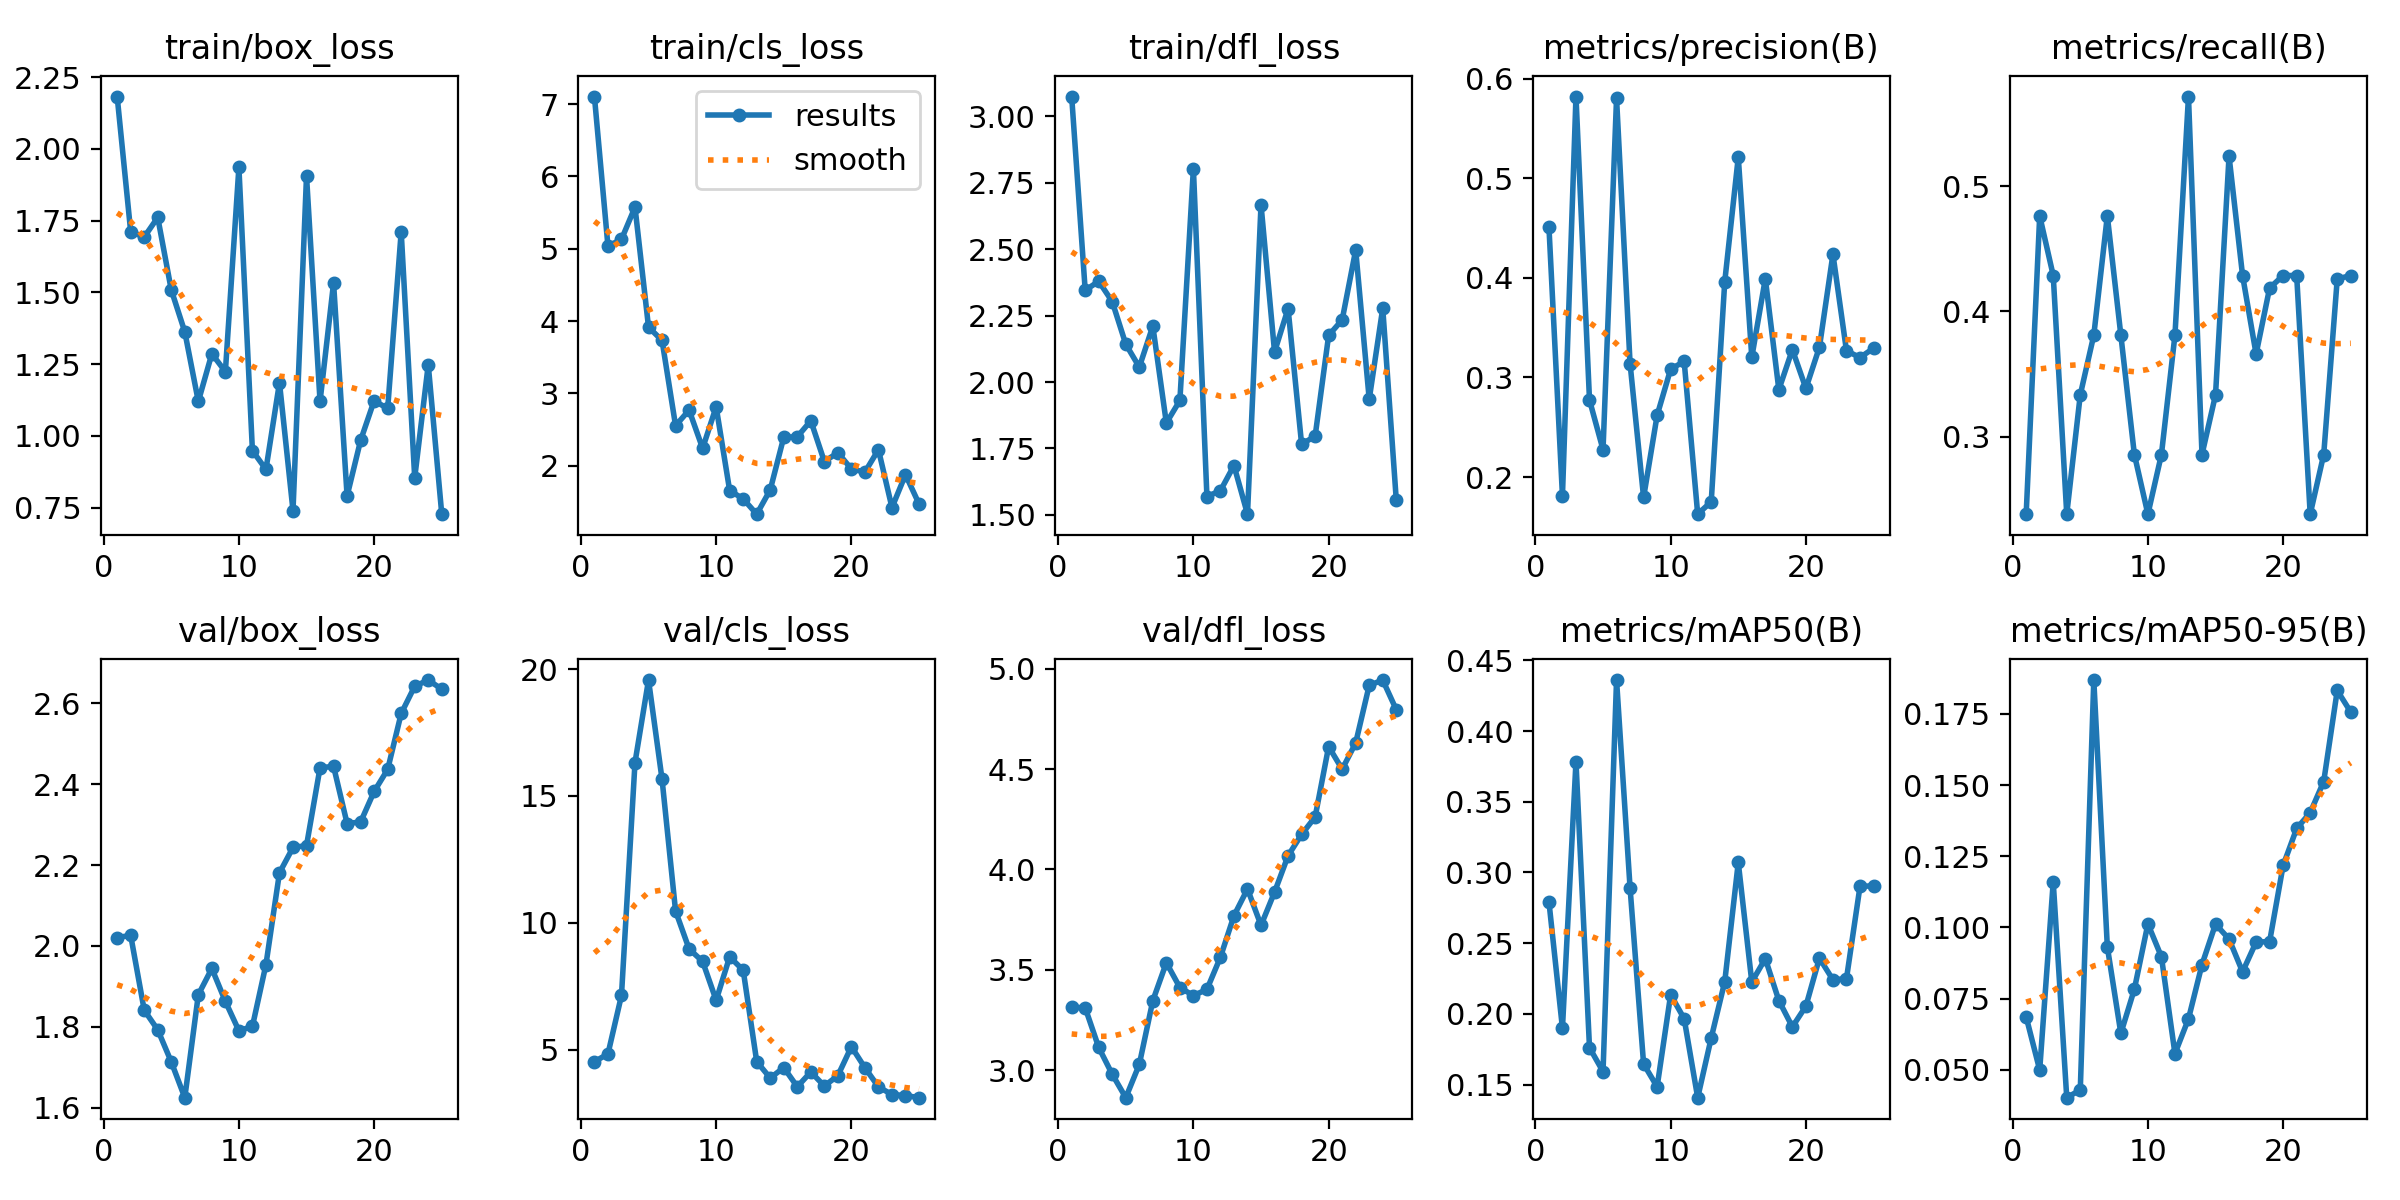

In [ ]:
Image(filename=f'/content/yolov5/yolov5/runs/detect/train2/results.png', width=600)

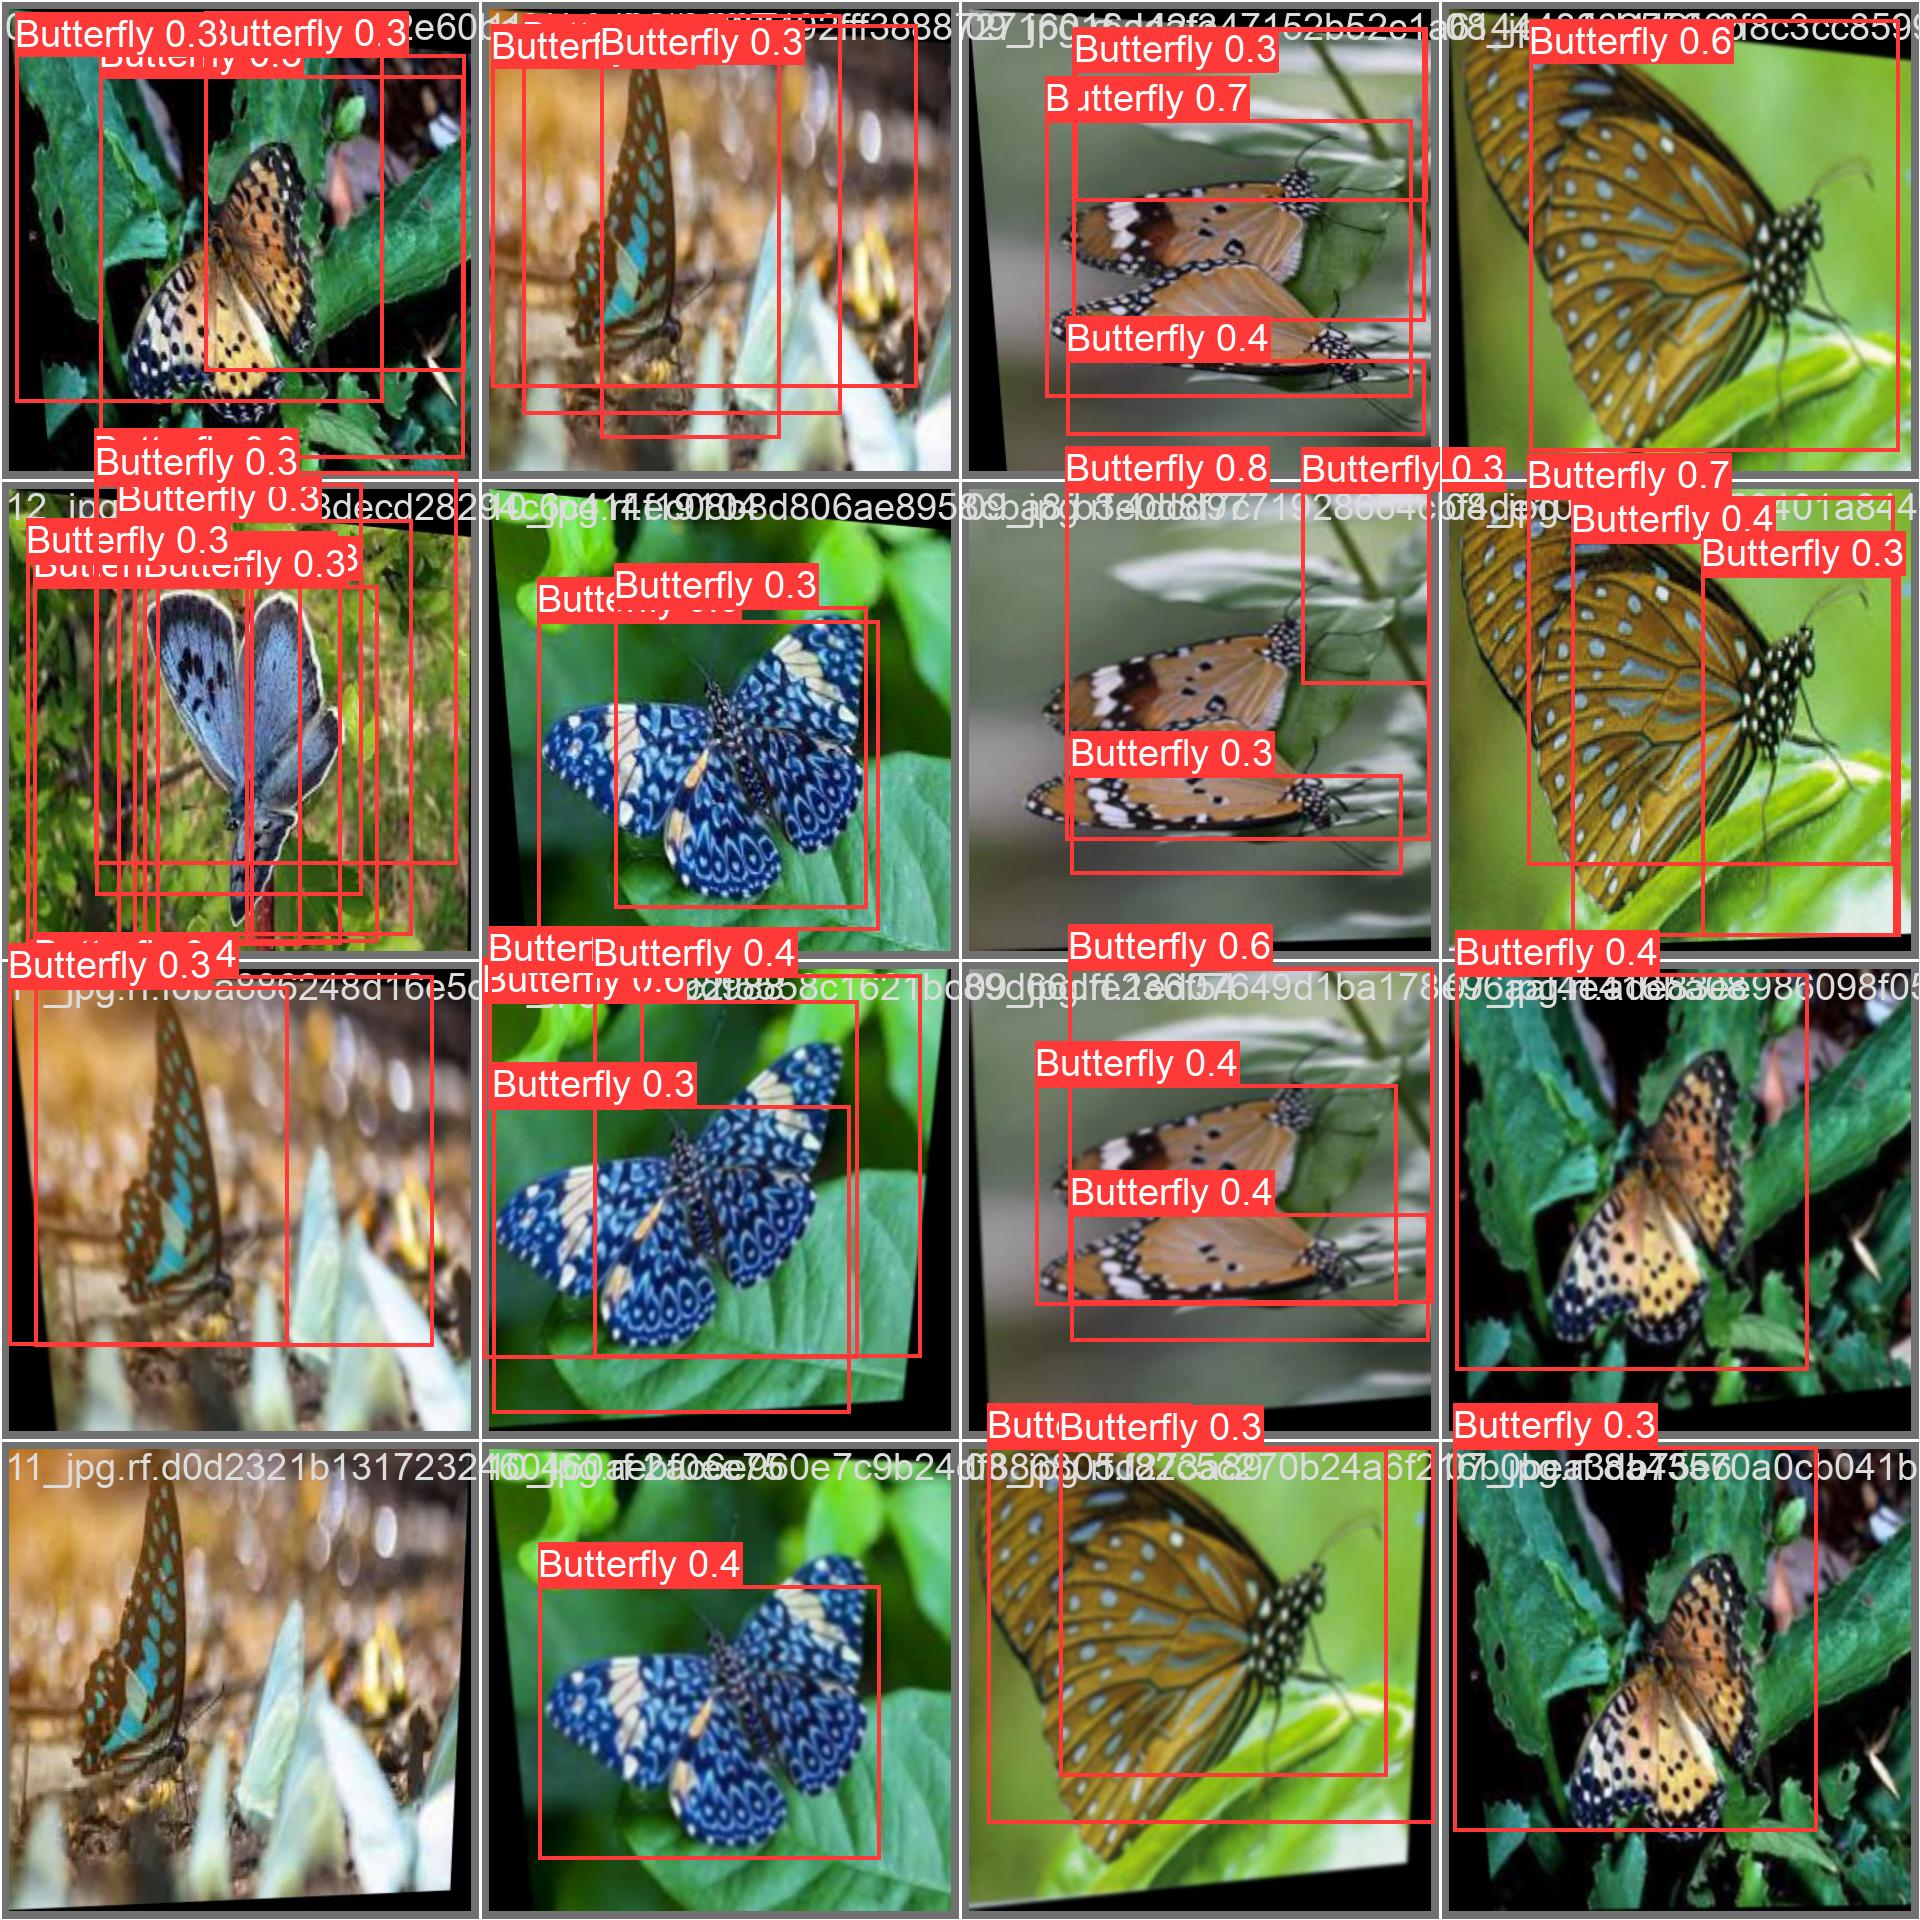

In [ ]:
Image(filename=f'/content/yolov5/yolov5/runs/detect/train2/val_batch0_pred.jpg', width=600)

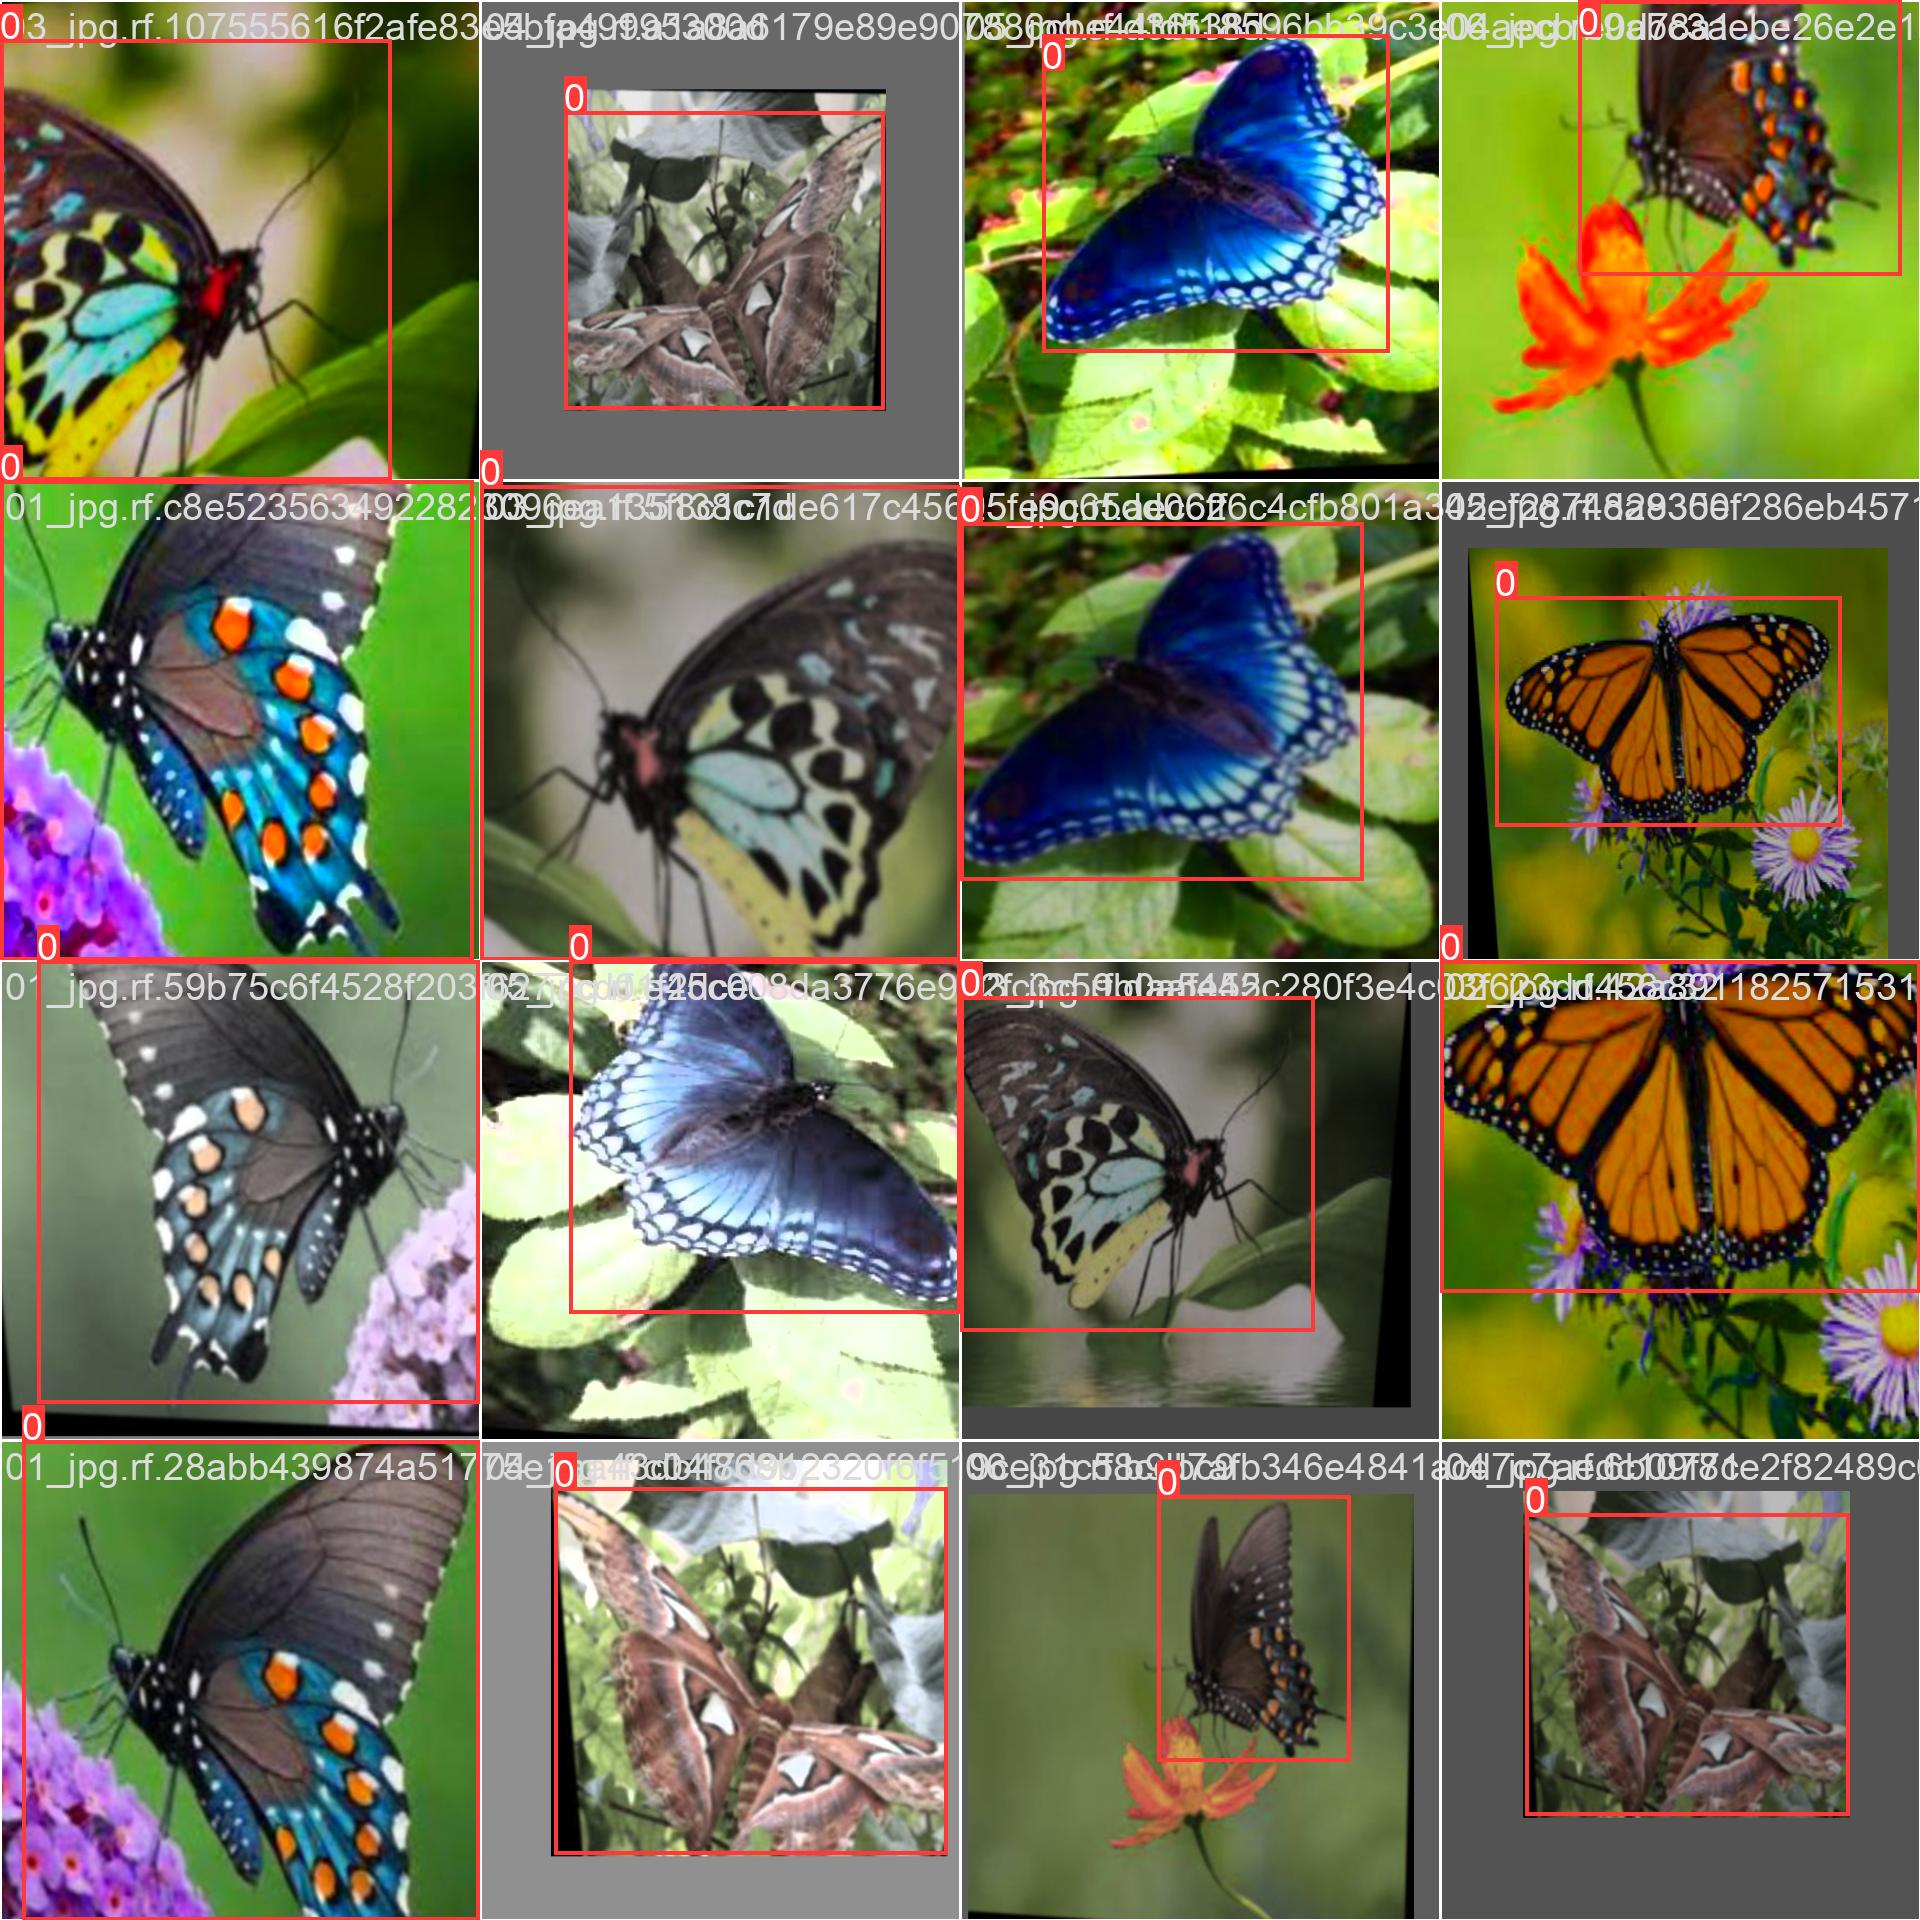

In [ ]:
Image(filename=f'/content/yolov5/yolov5/runs/detect/train2/train_batch30.jpg', width=600)